#Predicción de enfermedades cardíacas
 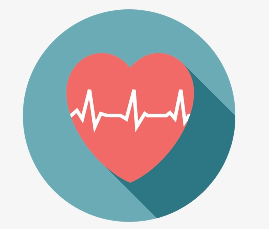

1.   El objetivo es armar un clasificador binario que permita predecir si un paciente podría presentar o no enfermedades cardíacas.
2.   Deberá entrenar un modelo clasificador y varios algoritmos para clasificación.Por ejemplo, en el caso de seleccionar un RandomForest debe entrenar con distinto número de estimadores (distantas cantidad de árboles), pero a su vez entrenar distintos KNN o regresión logística, etc. Deberá compararlos utilizando la métrica adecuada y elegir el mejor modelo.
3. Entre el dataset encontrará datos categóricos que requieren ser codificados, y datos numéricos para normalizar.
4. A modo de análisis, debe identificar si el dataset se encuentra correctamente balanceado (entre pacientes con y sin enfermedad cardíaca), y como está balanceado el dataset en cuanto a género y edad (este análisis es unicamente a modo informativo).

#Objetivo
***El accuracy del modelo definitivo debe superar el 80% (0.8)***

In [92]:
#Librerias a implementar
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

## Descarga del dataset


In [93]:

if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv > heart.csv
    else:
        !wget heart.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv

***El archivo `heart.csv` contiene la siguiente informacion:***
- **Edad:** edad del paciente (V. Cuantitativa discreta)
- **Sexo:** Sexo del paciente (Categórica con dos niveles: Femenino y Masculino)
- **Cp:** Tipo de dolor en el pecho (Categórica con 4 tipos)
Tipo 1: Angina típica
Tipo 2: Angina Atípica
Tipo 3: Dolor no anginal
Tipo 4: Asintomático
- **trestbps**: Presión arterial en reposo en mm Hg al ingreso al hospital (V. continua)
- **chol:** Colesterol sérico en mg /dl (V. continua)
- **fbs:** azúcar en sangre en ayunas > 120 mg/dl (categórica con 2 niveles: verdadero, falso)
- **restecg:** Resultados electrocardiográficos en reposo (Categórica con 3 niveles)
Nivel 0: Normal
Nivel 1: Tener anormalidad de onda ST-T (inversiones de onda T y / o elevación o Depresión de ST de > 005 mV)
Nivel 2: Muestra hipertropía ventricular izquierda probable o definitiva según los criterios de Estes.
- **thalach:** Frecuencia cardiaca máxima alcanzada (V. continua)
- **exang:** Angina inducida por el ejercicio (Categórica con dos niveles: Si, No)
- **oldpeak:** Depresión del ST inducida por el ejercicio en relación con el descanso (V. continua)
- **slope:** La pendiente del segmento ST de ejercicio pico (categórica con 3 niveles)
Valor 1: ascenso
Valor 2: plano
Valor 3: descenso
- **ca:** Numero de vasos principales (0-3) coloreados por fluoroscopia (Categórica con 4 niveles: 1-2-3-4)
- **thal:** El estado del corazón según la prueba de Thallium (Categórica con 3 niveles)
N = normal;
DF = defecto fijo
DR = defecto reversible
- **num :** Presencia de enfermedad cardíaca (estado de enfermedad angiográfica) (Categórica con 4 niveles)

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [94]:

# Lee con Pandas y el método read_csv. Se almacena en df

# el método describe(), mostrará la descripción estadistica básica del archivo
# Crea una fila nueva llamada Nan en el DataFrame  des,indicando la cantidad de datos tipo Nan que tiene cada columna.
# La información será de los datos faltantes df.isna().sum()
# Crea una fila nueva llamada %Nan en el DataFrame des,
# Esta fila se completará con los porcentajes de Nan encontrados en cada columna
df = pd.read_csv('heart.csv')
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [95]:
#Ver las primeras 5 filas del df

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
#Taduce nombre de columnas
df1 = df.copy()
df1.columns = ['edad', 'sexo', 'tipo_dolor_pecho', 'presion_arterial_reposo', 'colesterol','azucar_sangre_ayunas','resultado_cardio_reposo', 'frecuencia_cardiaca_maxima', 'angina_inducida', 'depresion_de_ST', 'segmento_ST_ejecicio_pico', 'numeroos_vasos_principales', 'estado_de_corazon', 'target']
df1.head()

,edad,sexo,tipo_dolor_pecho,presion_arterial_reposo,colesterol,azucar_sangre_ayunas,resultado_cardio_reposo,frecuencia_cardiaca_maxima,angina_inducida,depresion_de_ST,segmento_ST_ejecicio_pico,numeroos_vasos_principales,estado_de_corazon,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
#Cantidad de datos a observar
print('Cantidad de datos en observacion:', df1.shape[0])

Cantidad de datos en observacion: 303


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [98]:
#pacientes con y sin enfermedad
df1['target'].replace({0:"enfermo", 1:"no enfermo"}).value_counts()



no enfermo    165
enfermo       138
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

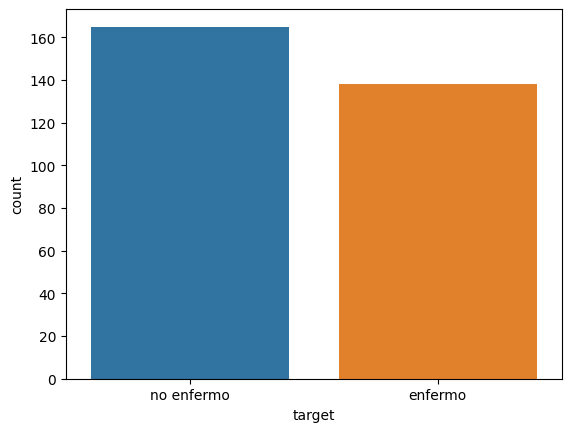

In [99]:
#grafico pacientes con y sin enfermedad
sns.countplot(x=df1['target'].replace({0:"enfermo", 1:"no enfermo"}))
plt.show

<Axes: xlabel='sexo', ylabel='count'>

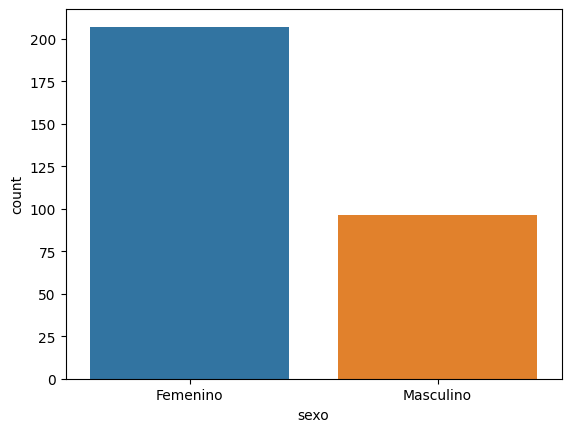

In [100]:
#Grafico segun sexo
sns.countplot(x=df1['sexo'].replace({0:'Masculino', 1:'Femenino'}))

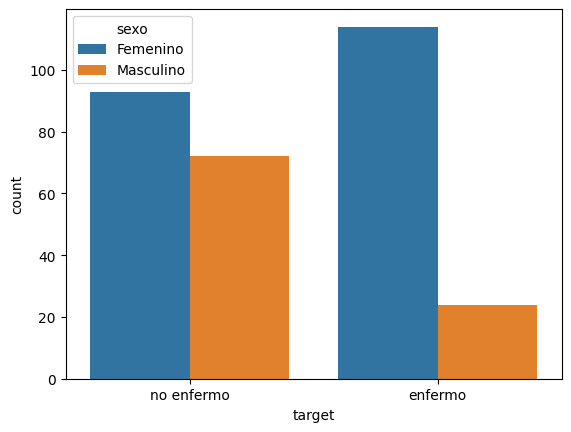

In [101]:
#Pacientes con y sin enfermedad segun sexo
sns.countplot(x=df1['target'].replace({0:"enfermo", 1:"no enfermo"}), hue=df1['sexo'].replace({0:'Masculino', 1:'Femenino'}))
plt.show()

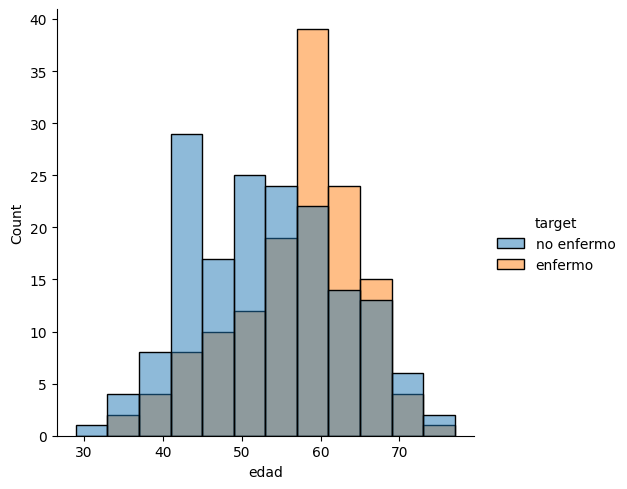

In [102]:
#Cantidad de pacientes segun edad si estan enfermos o no
sns.displot(data=df1 , x = df1['edad'], hue = df1['target'].replace({0:"enfermo", 1:"no enfermo"}))
plt.show()

In [103]:
df1.head()

,edad,sexo,tipo_dolor_pecho,presion_arterial_reposo,colesterol,azucar_sangre_ayunas,resultado_cardio_reposo,frecuencia_cardiaca_maxima,angina_inducida,depresion_de_ST,segmento_ST_ejecicio_pico,numeroos_vasos_principales,estado_de_corazon,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
#Normalizar datos
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


df1.loc[:, 'edad'] = scaler.fit_transform(df1[['edad']])
df1.loc[:, 'presion_arterial_reposo'] = scaler.fit_transform(df1[['presion_arterial_reposo']])
df1.loc[:, 'colesterol'] = scaler.fit_transform(df1[['colesterol']])
df1.loc[:, 'frecuencia_cardiaca_maxima'] = scaler.fit_transform(df1[['frecuencia_cardiaca_maxima']])

# Observar las  5 primeras filas
df1.head()


,edad,sexo,tipo_dolor_pecho,presion_arterial_reposo,colesterol,azucar_sangre_ayunas,resultado_cardio_reposo,frecuencia_cardiaca_maxima,angina_inducida,depresion_de_ST,segmento_ST_ejecicio_pico,numeroos_vasos_principales,estado_de_corazon,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,2.3,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,3.5,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,1.4,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.8,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.6,2,0,2,1


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

In [105]:
# numpy array "X" 
# array numpy "y" de solo la columna Survived
X = df1.drop('target', axis=1).values
y = df1['target'].values

In [106]:
# dataset de train y test 70%30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
#Randomforest (Mejorar esto)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
n_list = []
max_list = []
acu_list = []
m = 4
for n in range(2,11):
  clf = RandomForestClassifier(n_estimators=n, max_depth=m, criterion='entropy', random_state=0)
  clf.fit(X_train, y_train)
  y_hat_ra = clf.predict(X_test)
  
# Calcular la exactitud (accuracy)
  acu_core = accuracy_score(y_test, y_hat_ra, normalize=True)
#guardear en la lista el score
  acu_list.append(acu_core)
#guardar en la lista los n_estimators
  n_list.append(n)
#guardar en la list los max_depth
  max_list.append(m)

  m += 1

print(n_list)
print(max_list)
print(acu_list)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[4, 5, 6, 7, 8, 9, 10, 11, 12]
[0.7362637362637363, 0.7252747252747253, 0.7582417582417582, 0.7362637362637363, 0.8351648351648352, 0.7912087912087912, 0.8021978021978022, 0.8241758241758241, 0.7802197802197802]


In [108]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_hat_kn = clf.predict(X_test)

In [109]:
#Regresion lgistica
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf = clf.fit(X_train, y_train)
y_hat_log = clf.predict(X_test)


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [110]:
# accuracy random forest
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat_ra, normalize=True)

0.7802197802197802

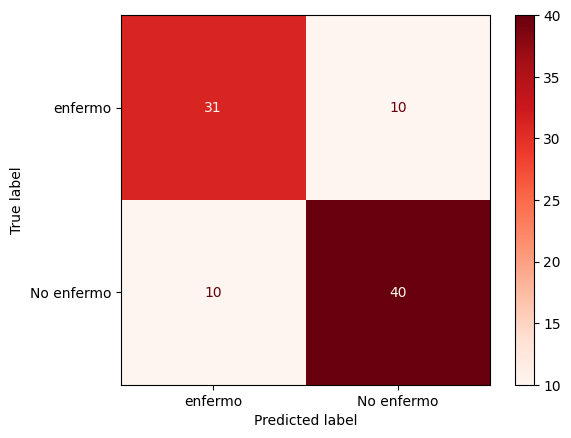

In [146]:
#Matriz de confusion random forest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat_ra)

cmd = ConfusionMatrixDisplay(cm, display_labels=['enfermo', 'No enfermo'])


cmd.plot(cmap=plt.cm.Reds)


plt.show()

In [112]:
# accuracy knn
accuracy_score(y_test, y_hat_kn, normalize=True)

0.6923076923076923

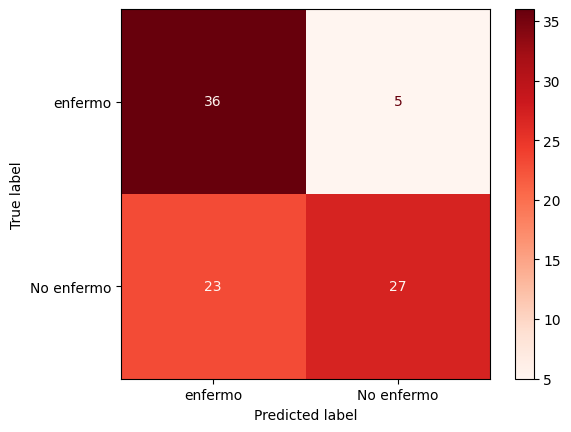

In [145]:
#Matriz de confusion knn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat_kn)

cmd = ConfusionMatrixDisplay(cm, display_labels=['enfermo', 'No enfermo'])

cmd.plot(cmap=plt.cm.Reds)

plt.show()

In [114]:
# accuracy regresion logistica
accuracy_score(y_test, y_hat_log, normalize=True)

0.8241758241758241

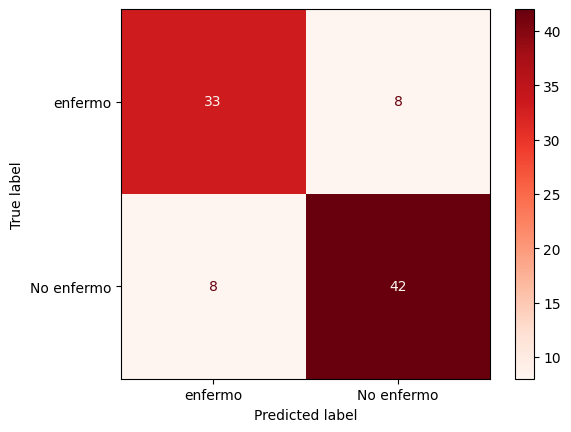

In [144]:
#Matriz de confusion regresion logistica
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat_log)

cmd = ConfusionMatrixDisplay(cm, display_labels=['enfermo', 'No enfermo'])

cmd.plot(cmap=plt.cm.Reds)

plt.show()

#Clasificacion Binaria con redes neuronales

In [116]:
#Entrada y salida 
in_shape = X.shape[1] 
out_shape = 1


In [117]:
#porcenjate de entrenamiento 80 - 20
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
#Clasificacion Binaria con redes neuronales
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
model = Sequential()

dropout_rate = 0.2

model.add(Dense(units=64, activation='sigmoid', input_shape=(in_shape,)))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=out_shape, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 64)                896       
                                                                 
 dense_45 (Dense)            (None, 64)                4160      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [135]:
#Clasificacion Binaria con redes neuronales
history = model.fit(X_train_b, y_train_b, validation_split=0.2 , epochs=50, batch_size=32)

Epoch 1/50
7/7 [==============================] - 1s 37ms/step - loss: 0.6668 - accuracy: 0.6321 - val_loss: 0.6035 - val_accuracy: 0.6735
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.6089 - accuracy: 0.6477 - val_loss: 0.5306 - val_accuracy: 0.7551
Epoch 3/50
7/7 [==============================] - 0s 12ms/step - loss: 0.5821 - accuracy: 0.6891 - val_loss: 0.4835 - val_accuracy: 0.8367
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 0.5831 - accuracy: 0.6477 - val_loss: 0.5428 - val_accuracy: 0.6939
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 0.4930 - accuracy: 0.7720 - val_loss: 0.4566 - val_accuracy: 0.7755
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 0.4585 - accuracy: 0.7979 - val_loss: 0.4161 - val_accuracy: 0.8367
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 0.4406 - accuracy: 0.7927 - val_loss: 0.3953 - val_accuracy: 0.8163
Epoch 8/50
7/7 [==============

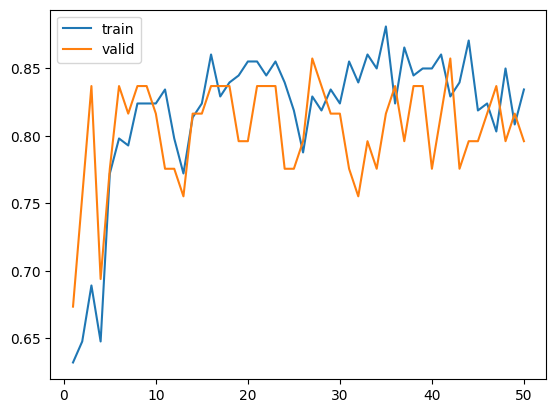

In [136]:
#Clasificacion Binaria con redes neuronales
epocas_conteo= range(1, len(history.history['accuracy']) + 1)

sns.lineplot(x=epocas_conteo,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epocas_conteo,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [137]:
#Clasificacion Binaria con redes neuronales
y_hat_prob = model.predict(X_test_b)
y_hat_prob[:3]

2/2 [==============================] - 0s 6ms/step


array([[0.47406328],
       [0.87586796],
       [0.84575254]], dtype=float32)

In [139]:
#Clasificacion Binaria con redes neuronales
#aca hay algo que no me cierra
y_hat_b = np.argmax(y_hat_prob,axis=1)
y_hat_b[:3]

array([0, 0, 0])


*  0 es enferno
* 1 no esta enfermmo  




# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [140]:
#Clasificacion Binaria con redes neuronales
scores = model.evaluate(X_test_b, y_test_b)



2/2 [==============================] - 0s 9ms/step - loss: 0.3906 - accuracy: 0.8525


In [141]:
#Clasificacion Binaria con redes neuronales
from sklearn.metrics import accuracy_score
accuracy_score(y_test_b, y_hat, normalize=True)

0.47540983606557374

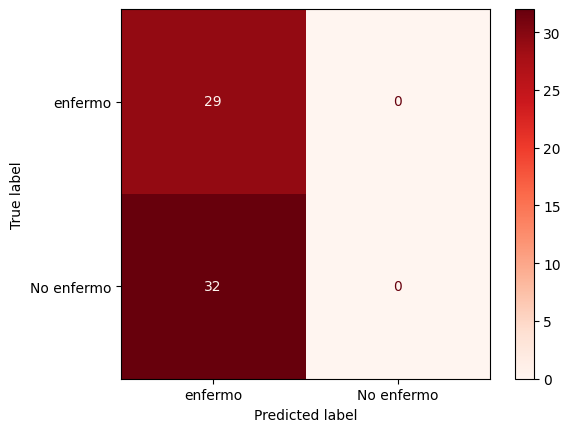

In [143]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_b, y_hat)

cmd = ConfusionMatrixDisplay(cm, display_labels=['enfermo', 'No enfermo'])

cmd.plot(cmap=plt.cm.Reds)

plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">